# Logistic Regression: Intuition

In this notebook, we discuss the intuition behind Logistic Regression, before diving into application.

Sources:
1. <a href='https://www.udemy.com/course/machinelearning/'>Machine Learning A-Z™: Hands-On Python & R In Data Science</a>

Logistic Regression can be a useful machine learning algorithm for classifying objects into one of two categories.  For example, suppose we want to predict whether someone will buy a product based on their age.  After gathering data, we can plot which age groups did buy the product, and which age groups did not buy the product.

In [1]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [2]:
# Create features
X = np.arange(start=20, stop=96, step=5)

# Create labels
y0 = [0 for i in range(8)]
y1 = [1 for i in range(8)]
y = np.array(y0 + y1)

In [3]:
# Change individual datapoints for variety
y[3], y[-4] = 1, 0

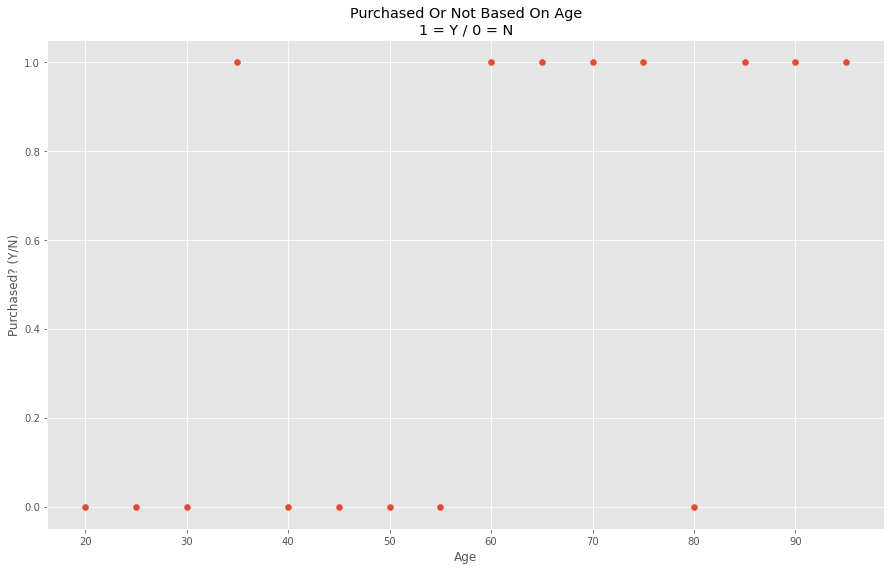

Figure 1.


In [4]:
# Create figure
plt.figure(figsize=(15,9))

# Plot data
plt.scatter(X, y)

# Add title
plt.title('Purchased Or Not Based On Age\n1 = Y / 0 = N')

# Add axis labels
plt.xlabel('Age')
plt.ylabel('Purchased? (Y/N)')

# Show graph
plt.show()

print('Figure 1.')

Intuitively, in Figure 1 we can see that there is a correlation between a person's age, and whether they brought the product, even if a few points behave unexpectedly.  Specifically, we can see that folks 55 and under typically do not buy this product, while folks 60 and older do buy this product.  Let's see what would happen if we tried to use simple linear regression to model this situation.

In [5]:
# Calculate linear regression line
m,b = np.polyfit(X,y,1)

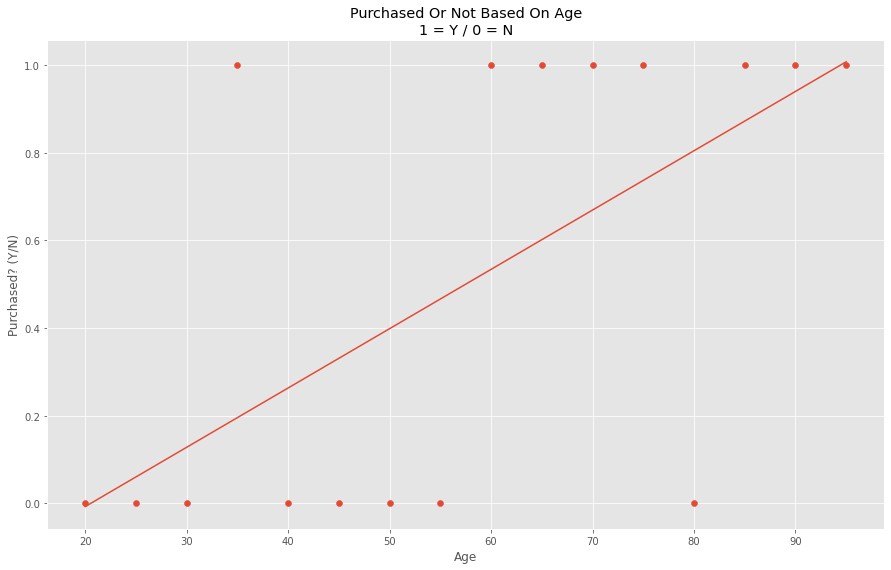

Figure 2.


In [6]:
# Create figure
plt.figure(figsize=(15,9))

# Plot data
plt.scatter(X, y)
plt.plot(X, m*X+b)

# Add title
plt.title('Purchased Or Not Based On Age\n1 = Y / 0 = N')

# Add axis labels
plt.xlabel('Age')
plt.ylabel('Purchased? (Y/N)')

# Show graph
plt.show()

print('Figure 2.')

In Figure 2 we can observe that a simple linear regression line isn't very meaninful.  While such a line moves up along the $y$-axis, the datapoints themselves sit at only one $y$-coordinate.  What if we tried flattening this line out then?

In [7]:
# Import dependency
from sklearn.linear_model import LogisticRegression

In [8]:
# Initialize logistic regression classifier
classifier = LogisticRegression(random_state=0)

In [9]:
# Define logistic regression model
model = classifier.fit(X.reshape(-1,1), y.reshape(-1,1))

# Define classes
classes = model.predict(X.reshape(-1,1))

C:\Users\tyler\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


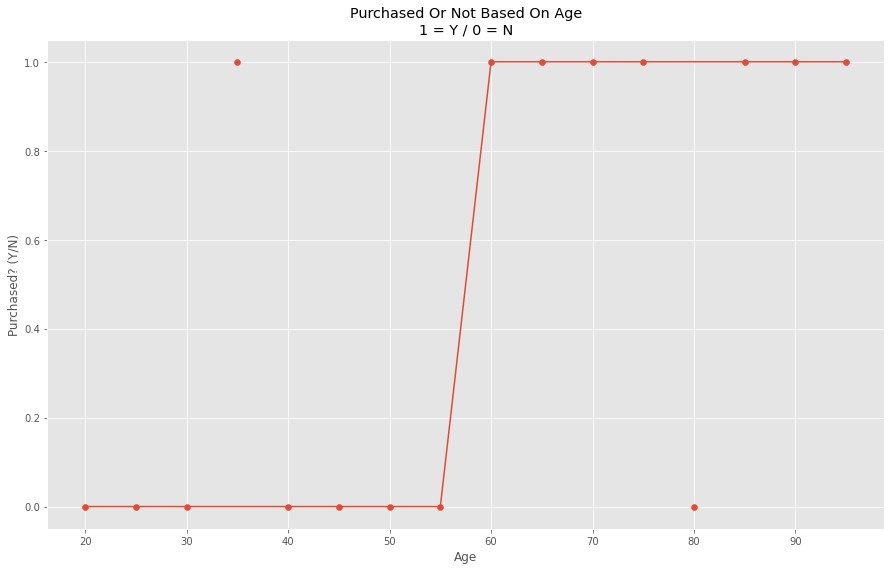

Figure 3.


In [10]:
# Create figure
plt.figure(figsize=(15,9))

# Plot data
plt.scatter(X, y)
plt.plot(X, classes)

# Add title
plt.title('Purchased Or Not Based On Age\n1 = Y / 0 = N')

# Add axis labels
plt.xlabel('Age')
plt.ylabel('Purchased? (Y/N)')

# Show graph
plt.show()

print('Figure 3.')

As seen in Figure 3, this type of curve models the data much better than a straight line, and this is the line we are calculating in logistic regression.

## Parking Lot Notes

You cna use the regplot() function in seaborn to do this quickly and easily

In [11]:
# Import dependencies
import seaborn as sns

C:\Users\tyler\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

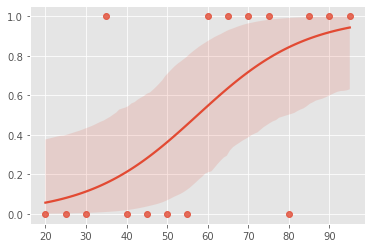

In [12]:
# Plot data
sns.regplot(X,y, logistic = True)